# **Totalmente conectado**

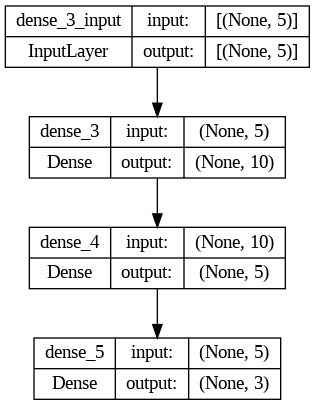

In [2]:
import pydot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

model = Sequential()
model.add(Dense(10, input_shape=(5,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

# **Convolucionales**

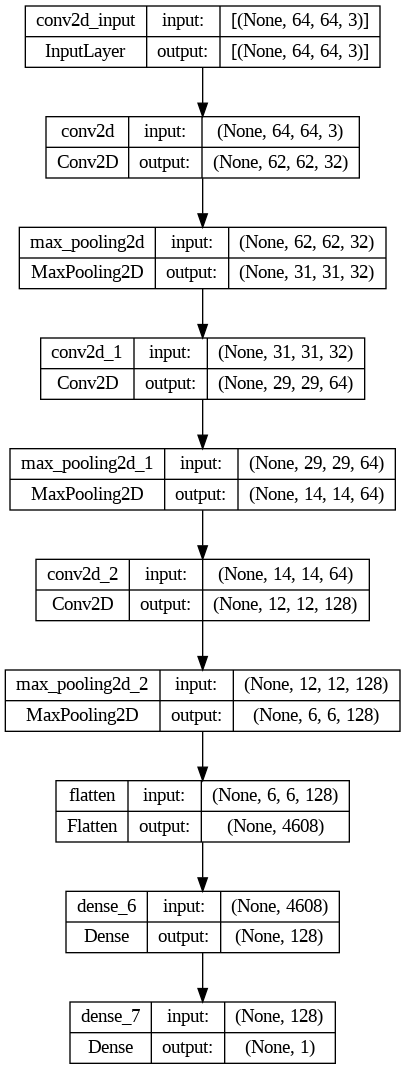

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

plot_model(model, to_file='convolutional_neural_network.png', show_shapes=True, show_layer_names=True)


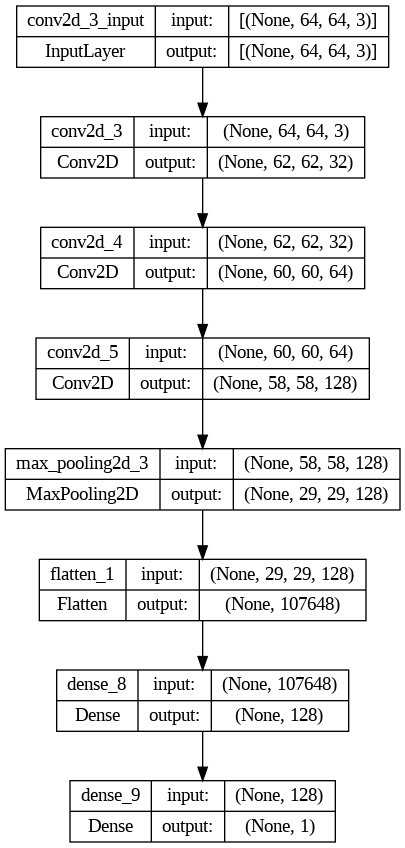

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

plot_model(model, to_file='convolutional_neural_network_with_maxpool.png', show_shapes=True, show_layer_names=True)


# **Encoder**

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 8)           584 

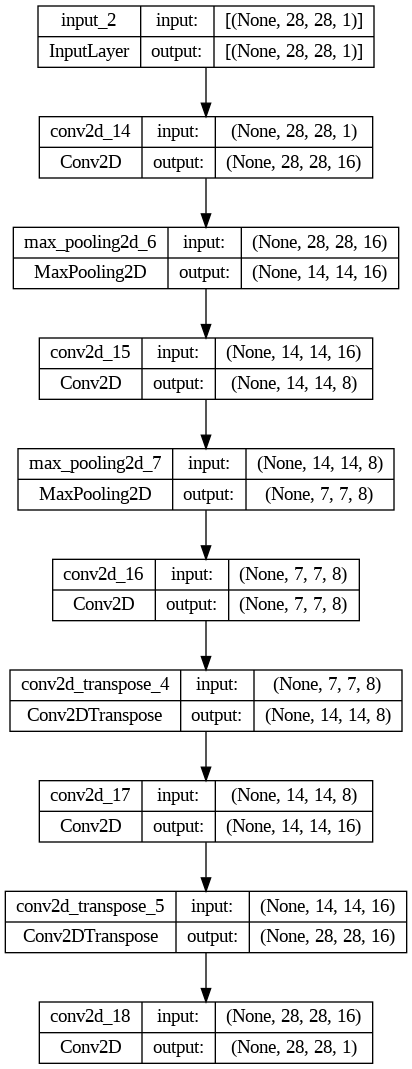

In [7]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.utils import plot_model

input_shape = (28, 28, 1)

encoder_input = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2DTranspose(8, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(encoder_input, decoded)

autoencoder.summary()
plot_model(autoencoder, to_file='encoder_decoder.png', show_shapes=True, show_layer_names=True)